<a href="https://colab.research.google.com/github/LotusZaheer/20192B105/blob/master/Nt_Clus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Osmnx**

#Configuración Inicial

In [1]:
#@title Conexión
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#@title Instalación librerías
!pip install geopandas contextily matplotlib==3.3 osmnx==1.1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.5 MB/s 
     |████████████████████████████████| 11.5 MB 28.2 MB/s 
     |████████████████████████████████| 93 kB 2.4 MB/s 
     |████████████████████████████████| 6.3 MB 39.9 MB/s 
     |████████████████████████████████| 1.0 MB 50.7 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 16.7 MB 28.6 MB/s 
     |████████████████████████████████| 19.3 MB 10.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. T

In [3]:
#@title Librerías
import osmnx as ox
import networkx as nx
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering

ox.config(use_cache=True, log_console=True)

import matplotlib.pyplot as plt

#Carga de datos

In [4]:
#@title Intermedio
"""
np.random.seed(7)
firm_centers = np.random.choice(G.nodes(), size=n_clusters, replace=False)


firm_centers = [53145241, 260707482, 53059187]

xs = []
ys = []
for osmid in firm_centers:
    x = G.nodes[osmid]['x']
    y = G.nodes[osmid]['y']
    np.random.seed(1)
    xs.extend(np.random.normal(loc=x, scale=0.001, size=int(n_firms/len(firm_centers))))
    ys.extend(np.random.normal(loc=y, scale=0.001, size=int(n_firms/len(firm_centers))))
    
firms = pd.DataFrame({'x':xs, 'y':ys})
len(firms)

#firms

"""

"\nnp.random.seed(7)\nfirm_centers = np.random.choice(G.nodes(), size=n_clusters, replace=False)\n\n\nfirm_centers = [53145241, 260707482, 53059187]\n\nxs = []\nys = []\nfor osmid in firm_centers:\n    x = G.nodes[osmid]['x']\n    y = G.nodes[osmid]['y']\n    np.random.seed(1)\n    xs.extend(np.random.normal(loc=x, scale=0.001, size=int(n_firms/len(firm_centers))))\n    ys.extend(np.random.normal(loc=y, scale=0.001, size=int(n_firms/len(firm_centers))))\n    \nfirms = pd.DataFrame({'x':xs, 'y':ys})\nlen(firms)\n\n#firms\n\n"

In [5]:
#@title Places
%%time
df = pd.read_csv('/content/drive/My Drive/Dijkstra/CO_CordobaRHW.csv')
df = df.drop(df[df['Departamento']=='Valor'].index)

df["Place"] = df["Municipio"].map(str) + " ," + df["Departamento"]
Places =df['Place'].unique()

CPU times: user 65.7 ms, sys: 14.2 ms, total: 80 ms
Wall time: 327 ms


In [6]:
#@title Nodos posición
df = df[['LatitudVentas','LongitudVentas']]
firms = df.rename(columns={'LongitudVentas':'x','LatitudVentas':'y'})
firms

,y,x
0,8.804231,-75.854510
1,8.810620,-75.855700
2,8.804874,-75.855085
3,8.801110,-75.849700
4,8.803874,-75.854492
...,...,...
10496,8.765565,-75.897443
10497,8.765695,-75.902564
10498,8.766724,-75.901839
10499,8.765897,-75.898602


In [7]:
#@title Cambio libreria matplitlib "Error por Osmnx"
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 5.1 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.3.0
    Uninstalling matplotlib-3.3.0:
      Successfully uninstalled matplotlib-3.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
osmnx 1.1.1 requires matplotlib>=3.3, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


#Celdas opcionales

In [ ]:
%%time
#@title Extracción Municipal

for place in Places:
  G = ox.graph_from_place(place, network_type='drive', buffer_dist=500)
  ox.save_graphml(G, "/content/drive/My Drive/Dijkstra/" + place[place.find(",")+1:] + "/" + place[:place.find(",")-1]+".graphml")
  print("Locacion: " + place + " cargada en la ruta " + place[place.find(",")+1:] + "/" + place[:place.find(",")-1]+".graphml")

In [ ]:
%%time
#@title Extracción departamental
G = ox.graph_from_place("Antioquia, Colombia", network_type='drive', buffer_dist=500)
ox.save_graphml(G, "/content/drive/My Drive/Dijkstra/antioquia.graphml")
G = ox.graph_from_place("Cordoba, Colombia", network_type='drive', buffer_dist=500)
ox.save_graphml(G, "/content/drive/My Drive/Dijkstra/cordoba.graphml")

#Por Departamentos

In [9]:
%%time
#@title Carga por departamentos
C = ox.load_graphml("/content/drive/My Drive/Dijkstra/cordoba.graphml")
A = ox.load_graphml("/content/drive/My Drive/Dijkstra/antioquia.graphml")
G= nx.compose(C,A)

CPU times: user 26.6 s, sys: 887 ms, total: 27.4 s
Wall time: 34.9 s


In [10]:
%%time
#@title Ploteo Cordoba
Cordoba, ax2 = ox.plot_graph(C, node_color='#aaaaaa', node_size=0, edge_color='#ffffff', show=False, close=True)
ax2.scatter(x=firms['x'], y=firms['y'], c='blue', marker='.', s=50, zorder=3, cmap=plt.cm.bwr)
Cordoba.canvas.draw()

CPU times: user 27.1 s, sys: 252 ms, total: 27.4 s
Wall time: 32.6 s


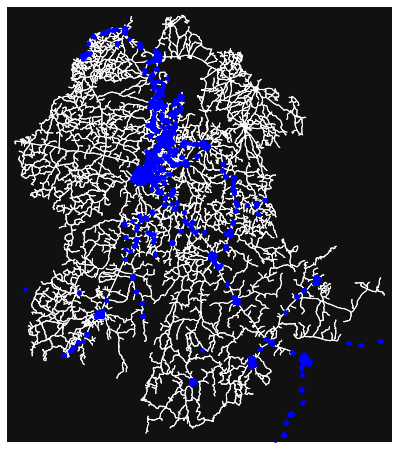

In [11]:
Cordoba

In [12]:
%%time
#@title Ploteo Antioquia
Antioquia, ax3 = ox.plot_graph(A, node_color='#ffffff', node_size=0, edge_color='#ffffff',  show=False, close=True)
ax3.scatter(x=firms['x'], y=firms['y'], c='red', marker='.', s=50, zorder=3, cmap=plt.cm.bwr)
Antioquia.canvas.draw()

CPU times: user 35.1 s, sys: 255 ms, total: 35.4 s
Wall time: 35.2 s


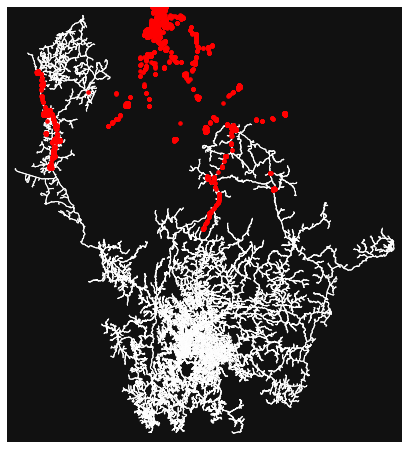

In [13]:
Antioquia

In [14]:
%%time
#@title Ploteo Departamentos
Ambos, ax = ox.plot_graph(G, node_color='#ffffff', node_size=0, edge_color='#ffffff',  show=False, close=True)
ax.scatter(x=firms['x'], y=firms['y'], c='green', marker='.', s=50, zorder=3, cmap=plt.cm.bwr)
Ambos.canvas.draw()

CPU times: user 54.9 s, sys: 299 ms, total: 55.2 s
Wall time: 55.4 s


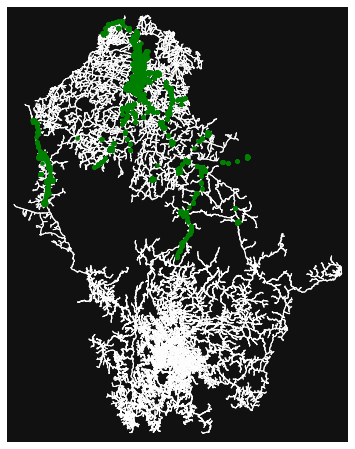

In [15]:
Ambos

#Por Municipios

In [16]:
%%time
print("------------------------------")
for place in Places:
  try:
    p = ox.load_graphml("/content/drive/My Drive/Dijkstra/" + place[place.find(",")+1:] + "/" + place[:place.find(",")-1]+".graphml")
    p0= nx.compose(p0,p)
    print("-> " + place[:place.find(",")-1] + " ha sido cargado")
  except:
    p0 = ox.load_graphml("/content/drive/My Drive/Dijkstra/" + place[place.find(",")+1:] + "/" + place[:place.find(",")-1]+".graphml")
    print(place[:place.find(",")-1] + " Inicia el grafo")
print(" ----- Grafo completado ----- ")
print("------------------------------")

------------------------------
Monteria Inicia el grafo
-> Cerete ha sido cargado
-> Turbo ha sido cargado
-> Apartado ha sido cargado
-> Carepa ha sido cargado
-> Chigorodo ha sido cargado
-> Caceres ha sido cargado
-> Taraza ha sido cargado
-> Lorica ha sido cargado
-> Cienaga De Oro ha sido cargado
-> San Carlos ha sido cargado
-> Planeta Rica ha sido cargado
-> Buenavista ha sido cargado
-> Tierralta ha sido cargado
-> Cotorra ha sido cargado
-> San Pelayo ha sido cargado
-> Montelibano ha sido cargado
-> Puerto Libertador ha sido cargado
-> Valencia ha sido cargado
-> San Pedro De Uraba ha sido cargado
-> Necocli ha sido cargado
-> Caucasia ha sido cargado
-> Ayapel ha sido cargado
-> La Apartada ha sido cargado
-> Nechi ha sido cargado
-> Valdivia ha sido cargado
-> El Bagre ha sido cargado
-> Zaragoza ha sido cargado
-> Pueblo Nuevo ha sido cargado
-> Sahagun ha sido cargado
-> San Bernardo Del Viento ha sido cargado
-> Monitos ha sido cargado
 ----- Grafo completado ----- 
----

In [17]:
%%time
#@title Ploteo Municipal
Municipios, ax = ox.plot_graph(p0, node_color='#ffffff', node_size=0, edge_color='#ffffff',  show=False, close=True)
ax.scatter(x=firms['x'], y=firms['y'], c='green', marker='.', s=50, zorder=3, cmap=plt.cm.bwr)
Municipios.canvas.draw()

CPU times: user 24.5 s, sys: 212 ms, total: 24.7 s
Wall time: 24.6 s


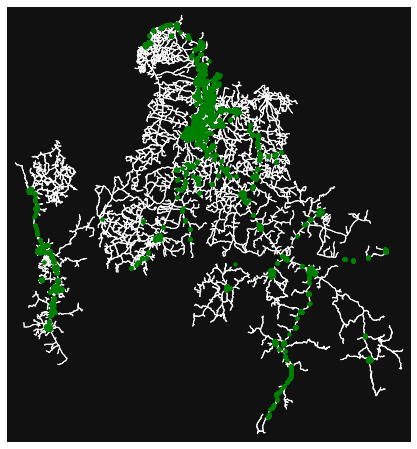

In [18]:
Municipios

#Distancias // En construcción



In [53]:
#@title Parametros
eps = 6000 ### En metros
minpts = 500

n_firms = 30
n_clusters = 3

##DBSCAN

In [65]:
%%time

eps_rad = eps / 3671000. #Metros a radianes
db = DBSCAN(eps=eps_rad, min_samples=minpts, metric='haversine', algorithm='ball_tree')
firmsDBSCAN['spatial_cluster'] = db.fit_predict(np.deg2rad(firms[['y', 'x']]))

CPU times: user 4min 33s, sys: 2min 41s, total: 7min 14s
Wall time: 3min 46s


In [69]:
print("DBSCAN: " + str(len(firmsDBSCAN['spatial_cluster'].unique())))

DBSCAN: 8
SpectralClustering: 8


In [70]:
firmsDBSCAN['spatial_cluster'].unique()

array([2, 6, 0, 3, 4, 7, 1, 5], dtype=int32)

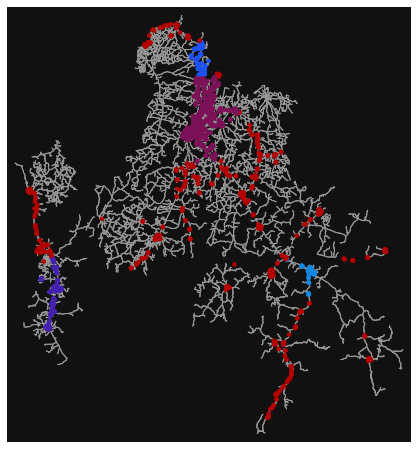

In [ ]:
# Firms en cluster
color_map = {-1:'#b30000',0:'#7c1158',1:'#4421af',2:'#1a53ff',3:'#0d88e6',4:'#00b7c7',5:'#5ad45a',6:'#8be04e',7:'#ebdc78',8:'#ffee65',9:'#beb9db',10:'#fdcce5',11:'#8bd3c7'}
point_colors = [color_map[c] for c in firmsDBSCAN['spatial_cluster']]
fig, ax = ox.plot_graph(p0, node_size=0, show=False, close=True)
ax.scatter(x=firms['x'], y=firms['y'], c=point_colors, marker='.', s=50, zorder=3)
fig.canvas.draw()
fig

##SpectralClustering

In [ ]:
%%time
db2 = SpectralClustering(n_clusters=8)
firmsSpectralClustering['spatial_cluster'] = db2.fit_predict(np.deg2rad(firms[['y', 'x']]))

In [ ]:
print("SpectralClustering: " + str(len(firmsSpectralClustering['spatial_cluster'].unique())))

In [72]:
firmsSpectralClustering['spatial_cluster'].unique()

array([2, 6, 0, 3, 4, 7, 1, 5], dtype=int32)

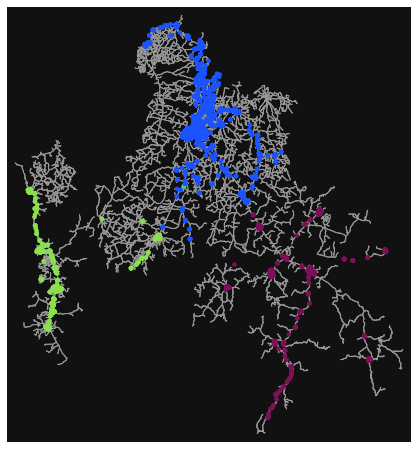

In [67]:
# Firms en cluster
color_map = {-1:'#b30000',0:'#7c1158',1:'#4421af',2:'#1a53ff',3:'#0d88e6',4:'#00b7c7',5:'#5ad45a',6:'#8be04e',7:'#ebdc78',8:'#ffee65',9:'#beb9db',10:'#fdcce5',11:'#8bd3c7'}
point_colors = [color_map[c] for c in firmsSpectralClustering['spatial_cluster']]
fig, ax = ox.plot_graph(p0, node_size=0, show=False, close=True)
ax.scatter(x=firms['x'], y=firms['y'], c=point_colors, marker='.', s=50, zorder=3)
fig.canvas.draw()
fig

In [41]:
# attach nearest network node to each firm
firms['nn'] = ox.nearest_nodes(G, X=firms['x'], Y=firms['y'])
print(len(firms['nn']))

# we'll get distances for each pair of nodes that have firms attached to them
nodes_unique = pd.Series(firms['nn'].unique())
nodes_unique.index = nodes_unique.values
print(len(nodes_unique))

# convert MultiDiGraph to DiGraph for simpler faster distance matrix computation
G_dm = nx.DiGraph(G)

10493
6760


In [ ]:
# calculate network-based distance between each node
def network_distance_matrix(u, G, vs=nodes_unique):
    
    dists = [nx.dijkstra_path_length(G, source=u, target=v, weight='length') for v in vs]
    return pd.Series(dists, index=vs)

In [ ]:
%%time
# create node-based distance matrix called node_dm
node_dm = nodes_unique.apply(network_distance_matrix, G=G_dm)
node_dm = node_dm.astype(int)
print(node_dm.size)

In [ ]:
node_dm[node_dm == 0] = 1
node_dm[node_dm > eps] = 0

In [ ]:
# reindex node-based distance matrix to create network-based distance matrix called ndm
ndm = node_dm.reindex(index=firms['nn'], columns=firms['nn'])
print('{:,.0f}'.format(ndm.size))

In [ ]:
%%time
# convert network-based distance matrix to a sparse matrix
ndm_sparse = csr_matrix(ndm)

In [ ]:
# how much space does the dense matrix use, in MB?
dense_size = ndm.to_numpy().nbytes / 1e6
dense_size

In [ ]:
# how much space does the sparse matrix use, in MB?
sparse_size = (ndm_sparse.data.nbytes + ndm_sparse.indptr.nbytes + ndm_sparse.indices.nbytes) / 1e6
sparse_size

In [ ]:
%%time
# use metric=precomputed to fit model to the sparse network-based distance matrix
db = DBSCAN(eps=eps, min_samples=minpts, metric='precomputed')
firms['network_cluster'] = db.fit_predict(ndm_sparse)

In [ ]:
len(firms['network_cluster'].unique())

In [ ]:
# plot firms by cluster
color_map = {-1:'gray', 0:'g', 1:'r', 2:'b', 3:'m', 4:'y', 5:'k', 6:'orange', 7:'pink'}
point_colors = [color_map[c] for c in firms['network_cluster']]
ns = [50 if n in firms['nn'].values else 0 for n in G.nodes()]
fig, ax = ox.plot_graph(G, node_color='gray', node_size=0, show=False, close=True)
ax.scatter(x=firms['x'], y=firms['y'], c=gist_rainbow, marker='.', s=50, zorder=3)
fig.canvas.draw()
fig

In [ ]:
# save the graph to disk
ox.save_graph_geopackage(G, filepath='data/graph.gpkg')

In [ ]:
# save and show the clustered firms data set
firms = firms.reindex(columns=['x', 'y', 'nn', 'spatial_cluster', 'network_cluster'])
firms.to_csv('data/clustered.csv', encoding='utf-8', index=False)
firms[:]